In [2]:
import sys
print(sys.executable)

/Users/marcin/EksploracjaDanych/venv/bin/python


<Axes: title={'center': 'All-Transactions House Price Index for California'}, xlabel='time', ylabel='Index value'>

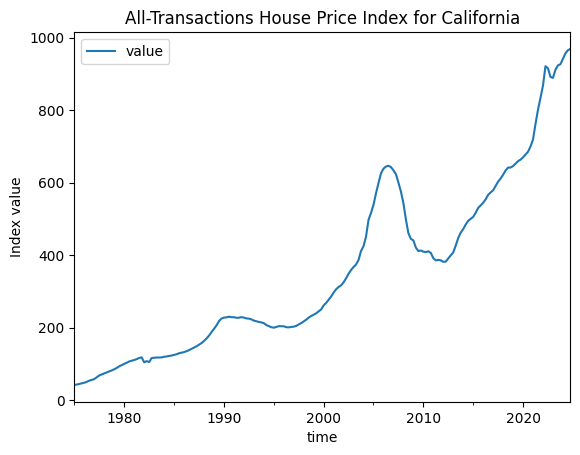

In [3]:
from matplotlib import pyplot as plt
import pandas as pd
import os

df = pd.read_csv(os.path.join('..', 'Datasets', 'CASTHPI.csv'))
df.rename(columns={'observation_date': 'date', 'CASTHPI': 'value'}, inplace=True)
df['date'] = pd.to_datetime(df['date'])
df['value'] = df['value'].astype('float32')
df.set_index('date', inplace=True)

df.plot(
    xlabel='time',
    ylabel='Index value',
    title='All-Transactions House Price Index for California',
)

In [4]:
import timesfm

# Loading the timesfm-2.0 checkpoint:

# For Torch
# tfm = timesfm.TimesFm(
#       hparams=timesfm.TimesFmHparams(
#           backend="gpu",
#           per_core_batch_size=32,
#           horizon_len=128,
#           num_layers=50,
#           use_positional_embedding=False,
#           context_len=2048,
#       ),
#       checkpoint=timesfm.TimesFmCheckpoint(
#           huggingface_repo_id="google/timesfm-2.0-500m-pytorch"),
#   )

# Loading the timesfm-1.0 checkpoint:

# For Torch
tfm = timesfm.TimesFm(
      hparams=timesfm.TimesFmHparams(
          backend="gpu",
          per_core_batch_size=32,
          horizon_len=128,
      ),
      checkpoint=timesfm.TimesFmCheckpoint(
          huggingface_repo_id="google/timesfm-1.0-200m-pytorch"),
  )

TimesFM v1.2.0. See https://github.com/google-research/timesfm/blob/master/README.md for updated APIs.
Loaded Jax TimesFM.


/Users/marcin/EksploracjaDanych/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loaded PyTorch TimesFM.


Fetching 3 files: 100%|██████████| 3/3 [00:00<00:00, 8197.34it/s]


In [5]:
df['unique_id'] = 'T1'
df.index.name = "ds"
df = df.reset_index()
df.head(10)


,ds,value,unique_id
0,1975-01-01,41.689999,T1
1,1975-04-01,42.770000,T1
2,1975-07-01,44.349998,T1
3,1975-10-01,45.779999,T1
4,1976-01-01,47.820000,T1
5,1976-04-01,50.279999,T1
6,1976-07-01,53.580002,T1
7,1976-10-01,55.599998,T1
8,1977-01-01,58.029999,T1
9,1977-04-01,63.020000,T1


In [6]:
forecast_df = tfm.forecast_on_df(
    inputs=df,
    freq="Q",  # quarterly
    value_name="value",
    num_jobs=-1,
)

Processing dataframe with multiple processes.
TimesFM v1.2.0. See https://github.com/google-research/timesfm/blob/master/README.md for updated APIs.
Loaded Jax TimesFM.
Loaded PyTorch TimesFM.
Finished preprocessing dataframe.
Finished forecasting.


/Users/marcin/EksploracjaDanych/venv/lib/python3.11/site-packages/utilsforecast/processing.py:384: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/Users/marcin/EksploracjaDanych/venv/lib/python3.11/site-packages/utilsforecast/processing.py:440: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  freq = pd.tseries.frequencies.to_offset(freq)


In [8]:
print(forecast_df.head())
print(forecast_df.shape)


  unique_id         ds     timesfm  timesfm-q-0.1  timesfm-q-0.2  \
0        T1 2024-12-31  993.484192     919.038025     949.921997   
1        T1 2025-03-31  985.910828     902.338318     933.314880   
2        T1 2025-06-30  973.520935     885.423218     915.761597   
3        T1 2025-09-30  968.344238     862.798218     900.480408   
4        T1 2025-12-31  960.126282     847.183105     893.483765   

   timesfm-q-0.3  timesfm-q-0.4  timesfm-q-0.5  timesfm-q-0.6  timesfm-q-0.7  \
0     960.977234     974.167419     993.484192    1003.549133    1018.361450   
1     953.845886     975.542847     985.910828     998.656799    1015.370178   
2     943.766235     957.329041     973.520935     990.320251    1008.419800   
3     926.234192     950.026306     968.344238     983.470520     998.377686   
4     920.061035     939.194336     960.126282     978.363647     999.071106   

   timesfm-q-0.8  timesfm-q-0.9  
0    1028.227051    1057.354004  
1    1031.021973    1066.223145  
2    102

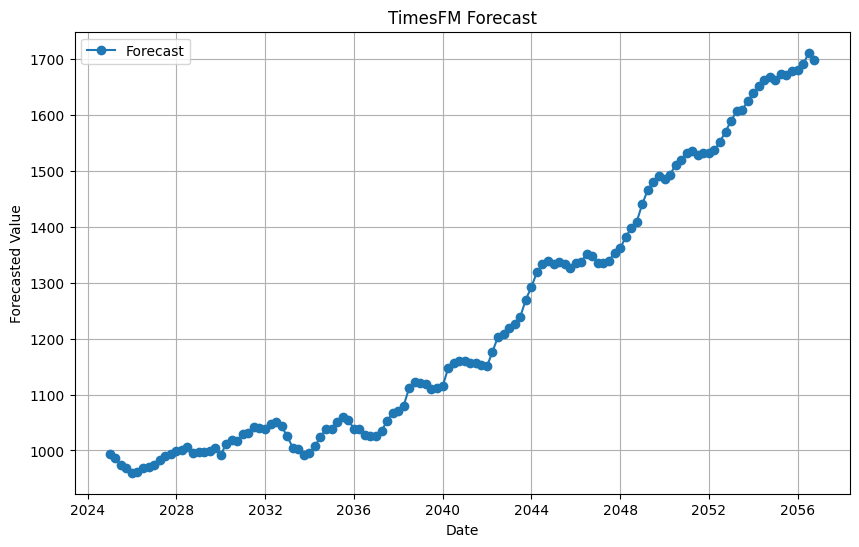

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(forecast_df['ds'], forecast_df['timesfm'], label="Forecast", marker='o')
plt.xlabel("Date")
plt.ylabel("Forecasted Value")
plt.title("TimesFM Forecast")
plt.legend()
plt.grid(True)
plt.show()


test size: 40


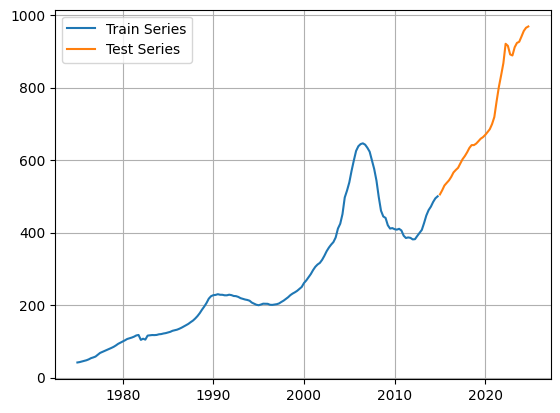

In [11]:
test_size = int(0.2 * len(df))
train_df = df.head(len(df) - test_size)
test_df = df.tail(test_size)
print("test size:", test_size)
plt.plot(train_df['ds'], train_df['value'], label = "Train Series")
plt.plot(test_df['ds'], test_df['value'], label = "Test Series")
plt.legend()
plt.grid()

In [12]:
forecast_df = tfm.forecast_on_df(
    inputs=train_df,
    freq="Q",  # quarterly
    value_name="value",
    num_jobs=-1,
)

Processing dataframe with multiple processes.
TimesFM v1.2.0. See https://github.com/google-research/timesfm/blob/master/README.md for updated APIs.
Loaded Jax TimesFM.
Loaded PyTorch TimesFM.
Finished preprocessing dataframe.
Finished forecasting.


/Users/marcin/EksploracjaDanych/venv/lib/python3.11/site-packages/utilsforecast/processing.py:384: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/Users/marcin/EksploracjaDanych/venv/lib/python3.11/site-packages/utilsforecast/processing.py:440: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  freq = pd.tseries.frequencies.to_offset(freq)


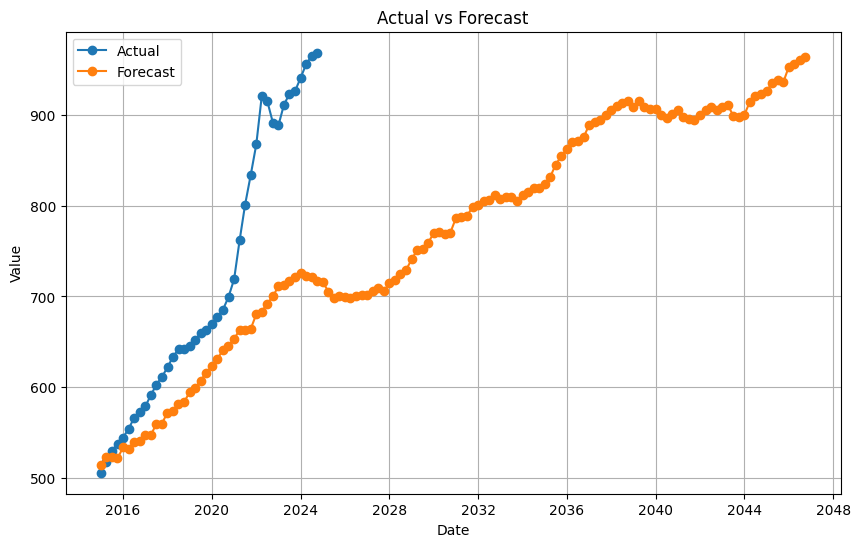

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(test_df['ds'], test_df['value'], label="Actual", marker='o')
plt.plot(forecast_df['ds'], forecast_df['timesfm'], label="Forecast", marker='o')
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Actual vs Forecast")
plt.legend()
plt.grid(True)
plt.show()